In [ ]:
#Copied mainly from: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

In [ ]:
#must upload images box.png and box_in_scene.png

In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:
#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to my_imshow.
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def my_imshow(title, img ):
  print(title)
  cv2_imshow(img) #should be changed to c2.imshow(img, title) when not in Colab

In [3]:
def myImshow(title, img):
    """
    function to make windows display work in jupyter notebook
    - shows image in a separate window,
    - waits for any key to close the window.

    """

    cv2.startWindowThread()
    my_imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
path = ""
#RGB images in BGR order in penCV
img1 = cv2.imread(path+'box.png',cv2.IMREAD_GRAYSCALE)          # queryImage
# Print error message if image is null
if img1 is None:
    print('Could not read query image')
else:
    print("Query Image read success...")

img2 = cv2.imread(path+'box_in_scene.png',cv2.IMREAD_GRAYSCALE) # targetImage
# Print error message if image is null
if img2 is None:
    print('Could not read training image')
else:
    print("Target Image read success...")

Query Image read success...
Target Image read success...


Query Image: 


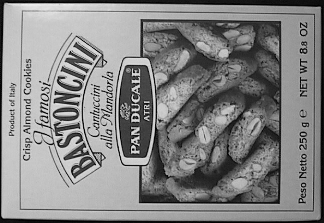

Target Image: 


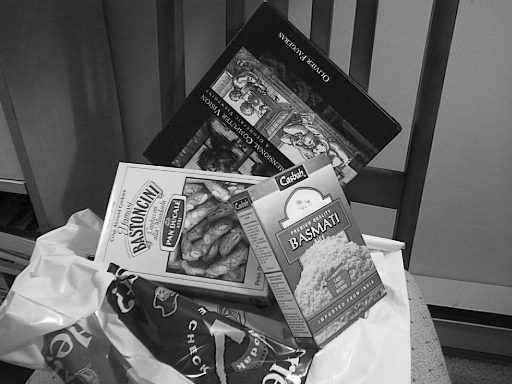

In [5]:
myImshow('Query Image: ', img1)
myImshow('Target Image: ', img2)

In [10]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
#cv.KeyPoint(pt, size[, angle[, response[, octave[, class_id]]]])
kp1, des1 = sift.detectAndCompute(img1,None) #find SIFT features for Query
kp2, des2 = sift.detectAndCompute(img2,None) #find SIFT features for Target

In [11]:
print(kp1[0], '\n',des1[0], '\n Size = ', des1[0].size)

< cv2.KeyPoint 0x7f8957c816b0> 
 [  0.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.
   1.  11.   1.   0.   0.   0.   0.   0.  27.  19.   0.   0.   0.   0.
   0.   0.  57.  11.  15.   0.   0.   0.   0.   0.   0.   8. 154.   2.
   0.   0.   0.   0.  18. 164.  33.   1.   0.   0.   0.   0. 164. 164.
   0.   0.   1.   0.   0.   0. 164.  56.  38.   4.   0.   0.   0.   0.
   0.   2. 164.  64.   0.   0.   0.   0.   1.  55. 154.  35.   2.   0.
   0.   0.  17.  43.   1.   6.   6.   0.   0.   0.  13.   4.  18.   2.
   0.   0.   0.   0.   0.   1. 164.  63.   0.   0.   0.   0.   0.   0.
 164.  37.   0.   0.   0.   0.   0.   0.   5.   4.   1.   0.   0.   0.
   0.   0.] 
 Size =  128


In [12]:
kp1[0].pt, kp1[0].size, kp1[0].angle #print first keypoint feature: {position (x,y), size, and orientation angle}.

((3.4104702472686768, 216.3043975830078),
 2.6696908473968506,
 278.2254333496094)

In [ ]:
#Show SIFT keypoints kp1 as circles with major orientation direction overlaid onto img1

In [ ]:
#Show SIFT keypoints kp2 as circles with major orientation direction overlaid onto img2

In [13]:
# BFMatcher with default params
bf = cv2.BFMatcher()
#if you use knnMatch, it will return a list of (the best) k matches instead of a single DMatch.
#in our example k=2, so will get a list of best 2 matches per feature point
matches = bf.knnMatch(des1,des2,k=2) #k = 2

In [14]:
print (matches)

((< cv2.DMatch 0x7f893c162610>, < cv2.DMatch 0x7f893c1622d0>), (< cv2.DMatch 0x7f893c162350>, < cv2.DMatch 0x7f893c1625f0>), (< cv2.DMatch 0x7f893c162370>, < cv2.DMatch 0x7f893c162310>), (< cv2.DMatch 0x7f893c162590>, < cv2.DMatch 0x7f893c1622f0>), (< cv2.DMatch 0x7f893c162530>, < cv2.DMatch 0x7f893c162570>), (< cv2.DMatch 0x7f893c162510>, < cv2.DMatch 0x7f893c1625b0>), (< cv2.DMatch 0x7f893c162670>, < cv2.DMatch 0x7f893c162690>), (< cv2.DMatch 0x7f893c1626b0>, < cv2.DMatch 0x7f893c1626d0>), (< cv2.DMatch 0x7f893c1626f0>, < cv2.DMatch 0x7f893c162710>), (< cv2.DMatch 0x7f893c162730>, < cv2.DMatch 0x7f893c162750>), (< cv2.DMatch 0x7f893c162770>, < cv2.DMatch 0x7f893c162790>), (< cv2.DMatch 0x7f893c1627b0>, < cv2.DMatch 0x7f893c1627d0>), (< cv2.DMatch 0x7f893c1627f0>, < cv2.DMatch 0x7f893c162810>), (< cv2.DMatch 0x7f893c162830>, < cv2.DMatch 0x7f893c162850>), (< cv2.DMatch 0x7f893c162870>, < cv2.DMatch 0x7f893c162890>), (< cv2.DMatch 0x7f893c1628b0>, < cv2.DMatch 0x7f893c1628d0>), (< cv2.

In [15]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [16]:
# cv2.drawMatchesKnn expects list of lists as matches.
#DrawMatchesFlags_DEFAULT
#DrawMatchesFlags_DRAW_OVER_OUTIMG
#DrawMatchesFlags_DRAW_RICH_KEYPOINTS
#DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
#plt.imshow(img3),plt.show()

Good matches:


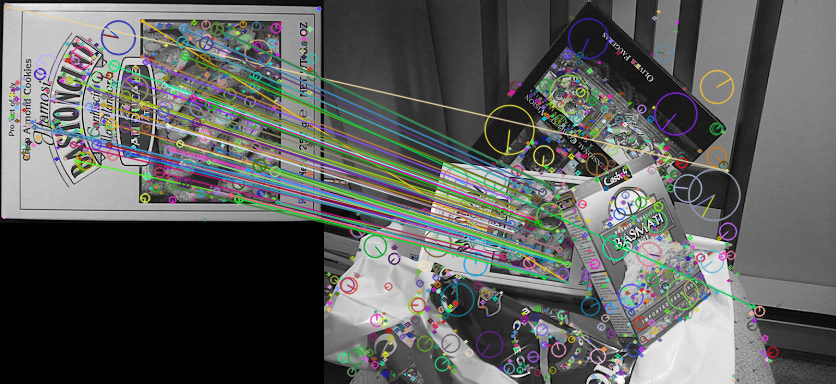

In [17]:
myImshow('Good matches:', img3)

In [18]:
#writes to file
cv2.imwrite(path+'sift_match.png', img3)

True